In [3]:
import numpy as np
import pandas as pd
import sys

from os.path import dirname
sys.path.append(dirname("../src/"))

from parse_protein_symbols import entrez_dict
from process_labels.get_labels import get_go_labels

def get_labels(proteins,
               obofile,
               g2gofile,
               GOT = "F",
               min_level = 5,
               min_protein_annotation = 50,
               symbol_to_id = lambda x:x):
    """
    Get the protein GO labels corresponding to a given protein.
    """
    
    go_type = "molecular_function"
    go_type = "biological_process" if GOT=="P" else go_type
    go_type = "cellular_component" if GOT=="C" else go_type
    
    filter_protein = {"namespace": go_type, "lower_bound": min_protein_annotation}
    filter_labels  = {"namespace": go_type, "min_level": min_level}
    f_labels, labels_dict = get_go_labels(filter_protein,
                                          filter_labels,
                                          proteins,
                                          lambda x: x,
                                          g2gofile,
                                          obofile,
                                          verbose = True)
    
    return f_labels, labels_dict

## <span style="color:red">Get the HuRI human network and the proteins</span>

The annotated HuRi network is annotated with entrez Id.

In [3]:
huri_network = pd.read_csv("../data/HuRi.connected.entrez.tsv", delim_whitespace = True, header = None)
huri_prots   = set(huri_network[0]).union(set(huri_network[1]))

## <span style="color:red">Get the STRING human network and the proteins</span>

The annotated STRING network is also annotated with entrez Id.

In [5]:
string_network = pd.read_csv("../data/human.STRING.entrez.tsv", delim_whitespace = True, header = None)
# TODO: Use both the TRAINING and TEST positive data here
string_prots   = set(string_network[0]).union(set(string_network[1]))

## <span style="color:red">Get the SUB-network constructed from the intersection of HuRI and STRING proteins</span>

| Desc.          | Freq.|
|--------------- |------|
|STRING proteins | 7365 |
|HuRI proteins   | 8224 |
|Intersection    | 3855 |

In [7]:
cprot = string_prots.intersection(huri_prots)
hsub  = ~(huri_network[0].isin(cprot) & huri_network[1].isin(cprot))
ssub  = ~(string_network[0].isin(cprot) & string_network[1].isin(cprot))

huri_net   = huri_network.drop(huri_network.index[hsub])
string_net = string_network.drop(string_network.index[ssub])

len(huri_net), len(string_net)

(11439, 13204)

## <span style="color:red"> Get GO labels for the Intersection Proteins </span>

The GO terms for MF, BP and CC hierarchies are >= 5

In [1]:
F_list, labels_F = get_labels(cprot,
                   "../data/go/go-basic.obo",
                   "../data/go/gene2go",
                   GOT = "F",
                   min_level = 5,
                   min_protein_annotation = 20,
                   symbol_to_id = lambda x:x)

NameError: name 'get_labels' is not defined

In [9]:
P_list, labels_P = get_labels(cprot,
                   "/afs/csail.mit.edu/u/k/kdevko01/Research/mg-attention/datasets/go/extracted/go-basic.obo",
                   "/afs/csail.mit.edu/u/k/kdevko01/Research/mg-attention/datasets/go/extracted/gene2go",
                   GOT = "P",
                   min_level = 5,
                   min_protein_annotation = 50,
                   symbol_to_id = lambda x:x)

HMS:0:00:03.277595 335,858 annotations, 20,671 genes, 18,441 GOs, 1 taxids READ: /afs/csail.mit.edu/u/k/kdevko01/Research/mg-attention/datasets/go/extracted/gene2go 
18388 IDs in loaded association branch, biological_process
  EXISTS: /afs/csail.mit.edu/u/k/kdevko01/Research/mg-attention/datasets/go/extracted/go-basic.obo
/afs/csail.mit.edu/u/k/kdevko01/Research/mg-attention/datasets/go/extracted/go-basic.obo: fmt(1.2) rel(2021-02-01) 47,291 Terms; optional_attrs(relationship)
Labels Obtained! The number of labels obtained is 44


In [10]:
C_list, labels_C = get_labels(cprot,
                   "/afs/csail.mit.edu/u/k/kdevko01/Research/mg-attention/datasets/go/extracted/go-basic.obo",
                   "/afs/csail.mit.edu/u/k/kdevko01/Research/mg-attention/datasets/go/extracted/gene2go",
                    GOT = "C",
                    min_level = 5,
                    min_protein_annotation = 30,
                    symbol_to_id = lambda x:x)

HMS:0:00:03.338808 335,858 annotations, 20,671 genes, 18,441 GOs, 1 taxids READ: /afs/csail.mit.edu/u/k/kdevko01/Research/mg-attention/datasets/go/extracted/gene2go 
18388 IDs in loaded association branch, cellular_component
  EXISTS: /afs/csail.mit.edu/u/k/kdevko01/Research/mg-attention/datasets/go/extracted/go-basic.obo
/afs/csail.mit.edu/u/k/kdevko01/Research/mg-attention/datasets/go/extracted/go-basic.obo: fmt(1.2) rel(2021-02-01) 47,291 Terms; optional_attrs(relationship)
Labels Obtained! The number of labels obtained is 39


## <span style="color:red"> Get GO labels for the STRING Proteins </span>

The GO terms for MF, BP and CC hierarchies are >= 5

In [18]:
S_list = {}
S_labels = {}
for GO in ["P", "F", "C"]:
    print("--"*50 + GO + "--" * 50)
    S_list[GO], S_labels[GO] = get_labels(string_prots,
                       "/afs/csail.mit.edu/u/k/kdevko01/Research/mg-attention/datasets/go/extracted/go-basic.obo",
                       "/afs/csail.mit.edu/u/k/kdevko01/Research/mg-attention/datasets/go/extracted/gene2go",
                       GOT = GO,
                       min_level = 5,
                       min_protein_annotation = 50,
                       symbol_to_id = lambda x:x)

----------------------------------------------------------------------------------------------------P----------------------------------------------------------------------------------------------------
HMS:0:00:04.104210 335,858 annotations, 20,671 genes, 18,441 GOs, 1 taxids READ: /afs/csail.mit.edu/u/k/kdevko01/Research/mg-attention/datasets/go/extracted/gene2go 
18388 IDs in loaded association branch, biological_process
  EXISTS: /afs/csail.mit.edu/u/k/kdevko01/Research/mg-attention/datasets/go/extracted/go-basic.obo
/afs/csail.mit.edu/u/k/kdevko01/Research/mg-attention/datasets/go/extracted/go-basic.obo: fmt(1.2) rel(2021-02-01) 47,291 Terms; optional_attrs(relationship)
Labels Obtained! The number of labels obtained is 111
----------------------------------------------------------------------------------------------------F----------------------------------------------------------------------------------------------------
HMS:0:00:03.487370 335,858 annotations, 20,671 genes, 18,441

In [19]:
H_list = {}
H_labels = {}
for GO in ["P", "F", "C"]:
    print("--"*50 + GO + "--" * 50)
    H_list[GO], H_labels[GO] = get_labels(huri_prots,
                       "/afs/csail.mit.edu/u/k/kdevko01/Research/mg-attention/datasets/go/extracted/go-basic.obo",
                       "/afs/csail.mit.edu/u/k/kdevko01/Research/mg-attention/datasets/go/extracted/gene2go",
                       GOT = GO,
                       min_level = 5,
                       min_protein_annotation = 50,
                       symbol_to_id = lambda x:x)

----------------------------------------------------------------------------------------------------P----------------------------------------------------------------------------------------------------
HMS:0:00:04.171020 335,858 annotations, 20,671 genes, 18,441 GOs, 1 taxids READ: /afs/csail.mit.edu/u/k/kdevko01/Research/mg-attention/datasets/go/extracted/gene2go 
18388 IDs in loaded association branch, biological_process
  EXISTS: /afs/csail.mit.edu/u/k/kdevko01/Research/mg-attention/datasets/go/extracted/go-basic.obo
/afs/csail.mit.edu/u/k/kdevko01/Research/mg-attention/datasets/go/extracted/go-basic.obo: fmt(1.2) rel(2021-02-01) 47,291 Terms; optional_attrs(relationship)
Labels Obtained! The number of labels obtained is 75
----------------------------------------------------------------------------------------------------F----------------------------------------------------------------------------------------------------
HMS:0:00:03.565969 335,858 annotations, 20,671 genes, 18,441 

## <span style="color:red">Computation of Average RESNIK similarities for Both HURI and STRING </span>

In [12]:
from goatools.obo_parser import GODag
from goatools.associations import read_gaf
from goatools.semantic import TermCounts, get_info_content
from goatools.semantic import resnik_sim


godag = GODag("/afs/csail.mit.edu/u/k/kdevko01/Research/mg-attention/datasets/go/extracted/go-basic.obo")
assoc_f = read_gaf("/afs/csail.mit.edu/u/k/kdevko01/Research/mg-attention/datasets/go/extracted/go-human.gaf", namespace = "MF")
assoc_p = read_gaf("/afs/csail.mit.edu/u/k/kdevko01/Research/mg-attention/datasets/go/extracted/go-human.gaf", namespace = "BP")
assoc_c = read_gaf("/afs/csail.mit.edu/u/k/kdevko01/Research/mg-attention/datasets/go/extracted/go-human.gaf", namespace = "CC")

tcount_f = TermCounts(godag, assoc_f)
tcount_p = TermCounts(godag, assoc_p)
tcount_c = TermCounts(godag, assoc_c)

/afs/csail.mit.edu/u/k/kdevko01/Research/mg-attention/datasets/go/extracted/go-basic.obo: fmt(1.2) rel(2021-02-01) 47,291 Terms
HMS:0:00:23.535098 608,616 annotations READ: /afs/csail.mit.edu/u/k/kdevko01/Research/mg-attention/datasets/go/extracted/go-human.gaf 
18053 IDs in loaded association branch, MF
HMS:0:00:09.811882 608,616 annotations READ: /afs/csail.mit.edu/u/k/kdevko01/Research/mg-attention/datasets/go/extracted/go-human.gaf 
17586 IDs in loaded association branch, BP
HMS:0:00:11.243124 608,616 annotations READ: /afs/csail.mit.edu/u/k/kdevko01/Research/mg-attention/datasets/go/extracted/go-human.gaf 
18859 IDs in loaded association branch, CC


In [13]:
def sem_similarity_(go_id, go_ids, go_dag, term_counts, avg = False):
    """
    If avg == True, compute the average Resnik Similarity Instead.
    """
    sims = [resnik_sim(go_id, go_i, go_dag, term_counts) for go_i in go_ids]
    if avg:
        return np.average(sims)
    return np.max(sims)
    
def sem_similarity(gois_1, gois_2, go_dag, term_counts, avg = False):
    """
    If avg == True, use the average Resnik Similarity, provided in Pandey et. al.
    https://academic.oup.com/bioinformatics/article/24/16/i28/201569
    """
    if avg:
        sims = [sem_similarity_(g1, gois_2, go_dag, term_counts) for g1 in gois_1]
        return np.average(sims)

In [20]:
def get_prot_lab_map(labels):
    prot_maps = {}
    for l in labels:
        for prot in list(labels[l]):
            if prot not in prot_maps:
                prot_maps[prot]  = [l]
            else:
                prot_maps[prot] += [l]
    return prot_maps

prot_F = get_prot_lab_map(labels_F)
prot_P = get_prot_lab_map(labels_P)
prot_C = get_prot_lab_map(labels_C)

In [21]:
S_prot = {}
H_prot = {}

for GO in ["P", "F", "C"]:
    S_prot[GO] = get_prot_lab_map(S_labels[GO])
    H_prot[GO] = get_prot_lab_map(H_labels[GO])

## SHARED HURI network

In [23]:
avg_results = {"MF": [], "BP": [], "CC": []}

hcf = 0
hcp = 0
hcc = 0
semf = 0.
semp = 0.
semc = 0.
for i, row in huri_net.iterrows():
    if row[0] in prot_F and row[1] in prot_F:
        sem   = sem_similarity(prot_F[row[0]], prot_F[row[1]], godag, tcount_f, avg = True)
        if sem != None:
            semf += sem
            hcf  += 1
    if row[0] in prot_P and row[1] in prot_P:
        sem   = sem_similarity(prot_P[row[0]], prot_P[row[1]], godag, tcount_p, avg = True)
        if sem != None:
            semp += sem
            hcp  += 1    
    if row[0] in prot_C and row[1] in prot_C:
        sem   = sem_similarity(prot_C[row[0]], prot_C[row[1]], godag, tcount_c, avg = True)
        if sem != None:
            semc += sem
            hcc  += 1
semf /= hcf
semc /= hcc
semp /= hcp

avg_results["MF"] += [semf]
avg_results["BP"] += [semp]
avg_results["CC"] += [semc]
#ss_F = lambda row: sem_similarity(prot_F[row[0]], prot_F[row[1]], go_dag, term_counts, avg = True) if row[0] in prot_F and row[1] in prot_F else 0
#x    = huri_net.apply(ss_F)
# Average for HURI

## Shared STRING network

In [24]:
hcf = 0
hcp = 0
hcc = 0
semf = 0.
semp = 0.
semc = 0.
for i, row in string_net.iterrows():
    if row[0] in prot_F and row[1] in prot_F:
        sem   = sem_similarity(prot_F[row[0]], prot_F[row[1]], godag, tcount_f, avg = True)
        if sem != None:
            semf += sem
            hcf  += 1
    if row[0] in prot_P and row[1] in prot_P:
        sem   = sem_similarity(prot_P[row[0]], prot_P[row[1]], godag, tcount_p, avg = True)
        if sem != None:
            semp += sem
            hcp  += 1    
    if row[0] in prot_C and row[1] in prot_C:
        sem   = sem_similarity(prot_C[row[0]], prot_C[row[1]], godag, tcount_c, avg = True)
        if sem != None:
            semc += sem
            hcc  += 1
semf /= hcf
semc /= hcc
semp /= hcp


avg_results["MF"] += [semf]
avg_results["BP"] += [semp]
avg_results["CC"] += [semc]
avg_results

{'MF': [1.230254433821741, 1.5086940360258054],
 'BP': [1.4184889623161654, 2.796802027917095],
 'CC': [1.0434917541606399, 1.4681873404535732]}

## Complete HURI network

In [25]:
hcf = 0
hcp = 0
hcc = 0
semf = 0.
semp = 0.
semc = 0.
for i, row in huri_network.iterrows():
    if row[0] in H_prot["F"] and row[1] in H_prot["F"]:
        sem   = sem_similarity(H_prot["F"][row[0]], H_prot["F"][row[1]], godag, tcount_f, avg = True)
        if sem != None:
            semf += sem
            hcf  += 1
    if row[0] in H_prot["P"] and row[1] in H_prot["P"]:
        sem   = sem_similarity(H_prot["P"][row[0]], H_prot["P"][row[1]], godag, tcount_p, avg = True)
        if sem != None:
            semp += sem
            hcp  += 1    
    if row[0] in H_prot["C"] and row[1] in H_prot["C"]:
        sem   = sem_similarity(H_prot["C"][row[0]], H_prot["C"][row[1]], godag, tcount_c, avg = True)
        if sem != None:
            semc += sem
            hcc  += 1
semf /= hcf
semc /= hcc
semp /= hcp

avg_results["MF"] += [semf]
avg_results["BP"] += [semp]
avg_results["CC"] += [semc]
avg_results

{'MF': [1.230254433821741, 1.5086940360258054, 1.1074388481951278],
 'BP': [1.4184889623161654, 2.796802027917095, 1.0222082225735245],
 'CC': [1.0434917541606399, 1.4681873404535732, 0.952129070420849]}

## Complete STRING network

In [27]:
hcf = 0
hcp = 0
hcc = 0
semf = 0.
semp = 0.
semc = 0.
for i, row in string_network.iterrows():
    if row[0] in S_prot["F"] and row[1] in S_prot["F"]:
        sem   = sem_similarity(S_prot["F"][row[0]], S_prot["F"][row[1]], godag, tcount_f, avg = True)
        if sem != None:
            semf += sem
            hcf  += 1
    if row[0] in S_prot["P"] and row[1] in S_prot["P"]:
        sem   = sem_similarity(S_prot["P"][row[0]], S_prot["P"][row[1]], godag, tcount_p, avg = True)
        if sem != None:
            semp += sem
            hcp  += 1    
    if row[0] in S_prot["C"] and row[1] in S_prot["C"]:
        sem   = sem_similarity(S_prot["C"][row[0]], S_prot["C"][row[1]], godag, tcount_c, avg = True)
        if sem != None:
            semc += sem
            hcc  += 1
semf /= hcf
semc /= hcc
semp /= hcp

avg_results["MF"] += [semf]
avg_results["BP"] += [semp]
avg_results["CC"] += [semc]
avg_results

{'MF': [1.230254433821741,
  1.5086940360258054,
  1.1074388481951278,
  1.4666489997307075],
 'BP': [1.4184889623161654,
  2.796802027917095,
  1.0222082225735245,
  3.244117831016514],
 'CC': [1.0434917541606399,
  1.4681873404535732,
  0.952129070420849,
  1.5990651888382186]}

In [28]:
df_results = pd.DataFrame(avg_results)
df_results["Network"] = ["HuRI", "STRING-HUMAN", "Complete-HuRI", "Complete-STRING"]

## <span style="color:red">RESNIK Results for HURI And STRING ON THE SAME NETWORK</span>

In [29]:
df_results = df_results.set_index("Network")
df_results.to_csv("huri_string_results.tsv", sep = "\t")
df_results

,MF,BP,CC
Network,,,
HuRI,1.230254,1.418489,1.043492
STRING-HUMAN,1.508694,2.796802,1.468187
Complete-HuRI,1.107439,1.022208,0.952129
Complete-STRING,1.466649,3.244118,1.599065


# <span style="color:red">Function Prediction: 5-fold Cross-validation on the STRING AND HuRI Networks using `Majority Vote` Algorithm</span> 

In [32]:
sys.path.append("../../src/")
from scoring import kfoldcv, kfoldcv_sim, kfoldcv_with_pr
import numpy as np
import predict

def create_predictor(similarity_matrix, is_wt, confidence = True):
    def predictor(training_labels):
        tlabels_f = lambda i: (training_labels[i] if i in training_labels else [])
        if is_wt:
            return predict.wmv(similarity_matrix, tlabels_f, confidence = confidence)
        else:
            return predict.mv(similarity_matrix, tlabels_f, confidence = confidence)
    return predictor

def net_to_mat(df_net, prot):
    protmap = {k:i for i, k in enumerate(prot)}
    A       = np.zeros((len(protmap), len(protmap)))
    for i, r in df_net.iterrows():
        p = protmap[r[0]]
        q = protmap[r[1]]
        A[p, q] = 1.0
        A[q, p] = 1.0
    return protmap, A



In [33]:
map_S, string_A = net_to_mat(string_net, cprot)
map_H, huri_A   = net_to_mat(huri_net, cprot)

In [34]:
pid_F = {map_S[key]:val for key, val in prot_F.items()}
pid_P = {map_S[key]:val for key, val in prot_P.items()}
pid_C = {map_S[key]:val for key, val in prot_C.items()}

In [35]:
results = {"acc_F": [], "acc_P": [], "acc_C": [], "f1_P": [], "f1_C": []}

In [36]:
acc_f_huri = kfoldcv(5,
                     pid_F,
                     create_predictor(huri_A, is_wt = True, confidence = False) 
                    )
acc_f_string = kfoldcv(5,
                     pid_F,
                     create_predictor(string_A, is_wt = True, confidence = False) 
                    )

results["acc_F"] = [np.average(k) for k in [acc_f_huri, acc_f_string]]

acc_p_huri = kfoldcv(5,
                     pid_P,
                     create_predictor(huri_A, is_wt = True, confidence = False) 
                    )
acc_p_string = kfoldcv(5,
                     pid_P,
                     create_predictor(string_A, is_wt = True, confidence = False) 
                    )

results["acc_P"] = [np.average(k) for k in [acc_p_huri, acc_p_string]]

acc_c_huri = kfoldcv(5,
                     pid_C,
                     create_predictor(huri_A, is_wt = True, confidence = False) 
                    )
acc_c_string = kfoldcv(5,
                     pid_C,
                     create_predictor(string_A, is_wt = True, confidence = False) 
                    )

results["acc_C"] = [np.average(k) for k in [acc_c_huri, acc_c_string]]



In [37]:
f1_f_huri = kfoldcv_with_pr(5,
                     pid_F,
                     create_predictor(huri_A, is_wt = True) 
                    )
f1_f_string = kfoldcv_with_pr(5,
                     pid_F,
                     create_predictor(string_A, is_wt = True) 
                    )

results["f1_F"] = [np.average(k) for k in [f1_f_huri, f1_f_string]]

f1_p_huri = kfoldcv_with_pr(5,
                     pid_P,
                     create_predictor(huri_A, is_wt = True) 
                    )
f1_p_string = kfoldcv_with_pr(5,
                     pid_P,
                     create_predictor(string_A, is_wt = True) 
                    )

results["f1_P"] = [np.average(k) for k in [f1_p_huri, f1_p_string]]

f1_c_huri = kfoldcv_with_pr(5,
                     pid_C,
                     create_predictor(huri_A, is_wt = True) 
                    )
f1_c_string = kfoldcv_with_pr(5,
                     pid_C,
                     create_predictor(string_A, is_wt = True) 
                    )

results["f1_C"] = [np.average(k) for k in [f1_c_huri, f1_c_string]]



In [38]:
df_mv = pd.DataFrame(results)

In [39]:
df_mv["network"] = ["HuRI", "STRING"]

In [40]:
df_mv.set_index("network")

,acc_F,acc_P,acc_C,f1_P,f1_C,f1_F
network,,,,,,
HuRI,0.147201,0.184006,0.378142,0.235094,0.401957,0.214376
STRING,0.267760,0.374582,0.517304,0.404698,0.545276,0.340854


In [41]:
df_mv.to_csv("mv_results.tsv", sep = "\t")

## DEGREE based Analysis

In [48]:
%load_ext autoreload
%autoreload 2

from scoring import kfoldcv, kfoldcv_sim, kfoldcv_with_pr

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
degree_thresholds = [5, 10, 25, 50, 100]
results           = [] # Tuple should be (degree_threshold, network, go, metric, fold, score)

for net, netname in [(huri_A, "Shared-HURI"), (string_A, "Shared-STRING")]:
    print(f"Using Network {netname}...")
    print("Constructing Degree matrix...")
    n, _      = net.shape 
    degrees   = net @ np.ones((n,1)).flatten()
    for kfold, kfold_metric, conf in [(kfoldcv, "Accuracy", False),
                                   (kfoldcv_with_pr, "F1-max", True)]:
        print(f"\t Using Metric {kfold_metric}...")
        print(f"\t Constructing Predictor...")
        predictor = create_predictor(net, is_wt = True, confidence = conf)

        for deg in degree_thresholds:
            print(f"\t\t Degree threshold: {deg}")
            thres_f = lambda x: degrees[x] <= deg
            for go, go_name in [(pid_F, "MF"),
                               (pid_P, "BP"),
                               (pid_C, "CC")]:
                print(f"\t\t\tGO label : {go_name}")
                res     = kfold(5,
                                go,
                                predictor,
                               filter_f = thres_f)
                print(res)
                for i, r in enumerate(res):
                    results.append((deg, netname, go_name, kfold_metric, i, r))

Using Network Shared-HURI...
Constructing Degree matrix...
	 Using Metric Accuracy...
	 Constructing Predictor...
		 Degree threshold: 5
			GO label : MF
[0.13043478260869565, 0.1210762331838565, 0.1210762331838565, 0.10714285714285714, 0.125]
			GO label : BP
[0.16049382716049382, 0.16205533596837945, 0.16793893129770993, 0.2, 0.15891472868217055]
			GO label : CC
[0.33509234828496043, 0.30808080808080807, 0.3038961038961039, 0.3005181347150259, 0.32225063938618925]
		 Degree threshold: 10
			GO label : MF
[0.13157894736842105, 0.12355212355212356, 0.11194029850746269, 0.16, 0.1348314606741573]
			GO label : BP
[0.17491749174917492, 0.1895424836601307, 0.1901639344262295, 0.1917808219178082, 0.2079207920792079]
			GO label : CC
[0.36666666666666664, 0.3390191897654584, 0.3579418344519016, 0.35053763440860214, 0.35555555555555557]
		 Degree threshold: 25
			GO label : MF
[0.13953488372093023, 0.14, 0.1353135313531353, 0.1437908496732026, 0.13758389261744966]
			GO label : BP
[0.2140762

In [3]:
df = pd.DataFrame(results, columns = ["Degree Threshold", "Network", "GO-type", "Metric", "Folds", "Score"])
df

NameError: name 'results' is not defined

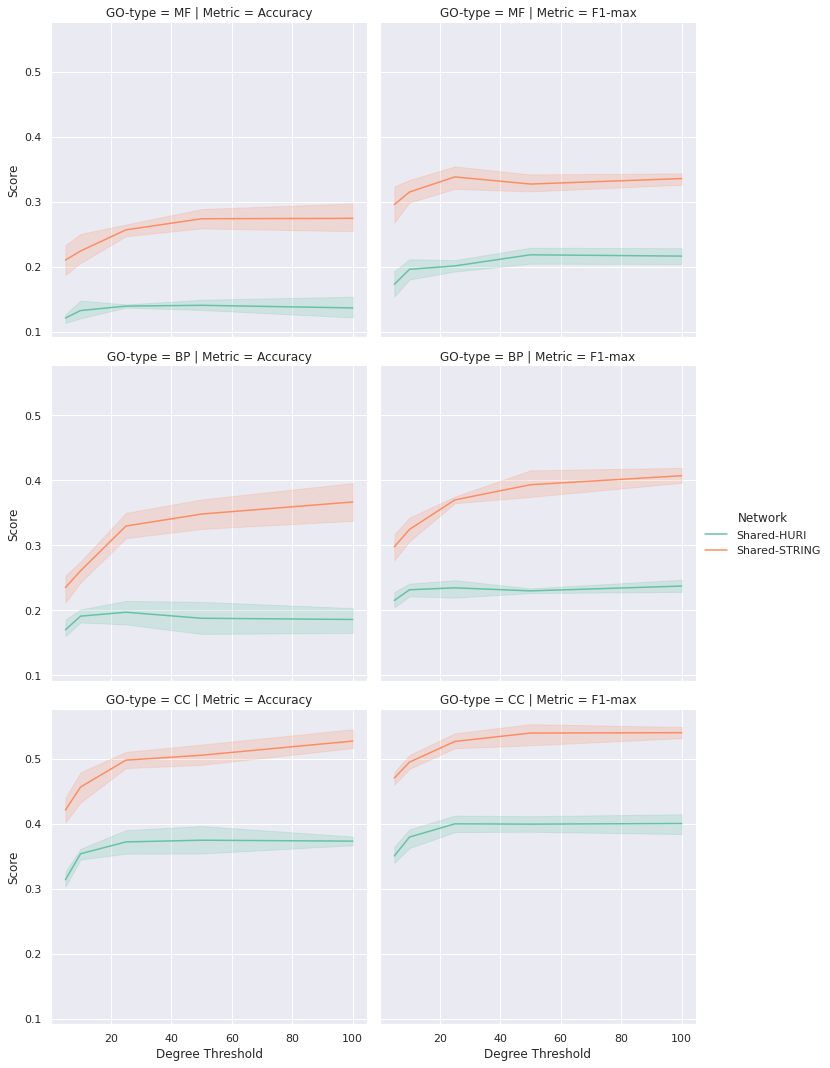

In [58]:
import seaborn as sns
sns.set_theme(style="darkgrid", palette="Set2")

sns.relplot(data = df, x="Degree Threshold", y="Score", hue="Network", row="GO-type", col="Metric", kind = "line")

## <span style="color:red">Comparing HURI Training Results between Topsy-Turvy and D-SCRIPT </span> 

<AxesSubplot:xlabel='iteration'>

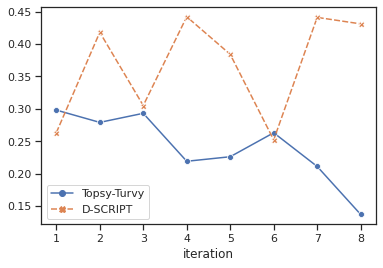

In [128]:
import numpy as np
import seaborn as sns
import pandas as pd
sns.set_theme(style = "ticks")

ds_h = [0.263, 0.418, 0.305, 0.442, 0.384, 0.252, 0.441, 0.431]
tt_h = [0.298, 0.279, 0.293, 0.219, 0.226, 0.263, 0.211, 0.137]

ds_iter = np.arange(8) + 1

results = {"iteration": ds_iter, "Topsy-Turvy": tt_h, "D-SCRIPT": ds_h}

df_res  = pd.DataFrame(results)

df_res = df_res.set_index('iteration')
sns.lineplot(data = df_res, markers = True)

## HURI - TEST Precision Recall Curve - DSCRIPT

### D-SCRIPT AUPR
![huri pr curve](../../tt-link/bash_files/DSCRIPT-HURI/results.aupr.png)

### D-SCRIPT AUROC
![huri pr curve](../../tt-link/bash_files/DSCRIPT-HURI/results.auroc.png)

## HURI - TEST Precision Recall Curve - TT

### D-SCRIPT AUPR
![huri pr curve](../../tt-link/bash_files/TT-HURI/results.aupr.png)

### D-SCRIPT AUROC
![huri pr curve](../../tt-link/bash_files/TT-HURI/results.auroc.png)

In [ ]:
# Remove the hubs in HURI? see 